# 作業目標:

    通過建立多層的神經網路, 了解權值矩陣更新

# 作業重點: 

3  層神經網路

通過增加更多的中間層，以對更多關係的組合進行建模

syn1 權值矩陣將隱層的組合輸出映射到最終結果，

而在更新 syn1 的同時，還需要更新 syn0 權值矩陣，

以從輸入資料中更好地產生這些組合

In [1]:
import numpy as np
 
# Sigmoid 函數可以將任何值都映射到一個位於 0 到  1 範圍內的值。通過它，我們可以將實數轉化為概率值
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])  
        
# define y for output dataset            
y = np.array([[0,0,1,1]]).T

In [2]:
y

array([[0],
       [0],
       [1],
       [1]])

In [3]:

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)
#亂數設定產生種子得到的權重初始化集仍是隨機分佈的，
#但每次開始訓練時，得到的權重初始集分佈都是完全一致的。
 
# initialize weights randomly with mean 0
#syn0 = 2*np.random.random((3,1)) - 1
syn0 = 2*np.random.random((3,4)) - 1 # adjusted according to reference answer

# define syn1
# the shape of syn1 should match the output
#syn1 = 2*np.random.random((1,4)) - 1
syn1 = 2*np.random.random((4,1)) - 1 # adjusted according to reference answer


#iter = 0
#該神經網路權重矩陣的初始化操作。
#用 “syn0” 來代指 (即“輸入層-第一層隱層”間權重矩陣）
#用 “syn1” 來代指 (即“輸入層-第二層隱層”間權重矩陣）



In [4]:
# so the network has 3 nodes in input layer; 
# 4 nodes in the first hidden layer; 
# 1 node in the second hidden layer; 
# 1 node in output layer

syn0

array([[-0.16595599,  0.44064899, -0.99977125, -0.39533485],
       [-0.70648822, -0.81532281, -0.62747958, -0.30887855],
       [-0.20646505,  0.07763347, -0.16161097,  0.370439  ]])

In [5]:
syn0_history = [syn0]
syn1_history = [syn1]

神經網路訓練
for 迴圈反覆運算式地多次執行訓練代碼，使得我們的網路能更好地擬合訓練集

In [6]:
for iter in range(60000):
    # forward propagation
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    
    '''
    新增
    l2_error 該值說明了神經網路預測時“丟失”的數目。
    l2_delta 該值為經確信度加權後的神經網路的誤差，除了確信誤差很小時，它近似等於預測誤差。
    '''
    #l2 = l1 * syn1.T
    l2 = nonlin(np.dot(l1,syn1)) # adjusted according to the reference answer
    l2_error = y - l2
    l2_delta = l2_error * nonlin(l2,True)

    if (iter% 5000) == 0:
        print("L2_Error:" + str(np.mean(np.abs(l2_error))))

    # how much did we miss?
    #l1_error = y - l1
    l1_error = np.dot(l2_delta,syn1.T) # adjusted according to the reference answer
 
    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    l1_delta = l1_error * nonlin(l1,True)

    if (iter% 5000) == 0:
        print("L1_Error:" + str(np.mean(np.abs(l1_error))))

    
    # update weights
    #syn0 += np.dot(l0.T,l1_delta+l2_delta)
    syn0 += np.dot(l0.T,l1_delta) # adjusted according to the reference answer
    syn0_history.append(syn0)
     # syn1 update weights
    syn1 += np.dot(l1.T,l2_delta)
    syn1_history.append(syn1)
    
print("Output After Training:")
print(l1)
print("\n\n")
print(l2)

L2_Error:0.4685343254580603
L1_Error:0.07675981358453121
L2_Error:0.007280733653110541
L1_Error:0.00019039373702324546
L2_Error:0.005002426725395314
L1_Error:9.49354698412975e-05
L2_Error:0.004026187726586657
L1_Error:6.336552828896651e-05
L2_Error:0.0034544054615330494
L1_Error:4.760906725125124e-05
L2_Error:0.0030687616376916284
L1_Error:3.8157242532281836e-05
L2_Error:0.0027865570196723543
L1_Error:3.185362049493971e-05
L2_Error:0.0025687239078333096
L1_Error:2.7348146916485016e-05
L2_Error:0.0023941155055209767
L1_Error:2.3966481769503123e-05
L2_Error:0.0022501668284784287
L1_Error:2.1334176345837424e-05
L2_Error:0.0021288852682254137
L1_Error:1.9226602687905982e-05
L2_Error:0.0020249145146683397
L1_Error:1.7500814335893624e-05
Output After Training:
[[0.70867211 0.16196423 0.87991049 0.61679878]
 [0.63949508 0.11242379 0.88471674 0.57047777]
 [0.13455945 0.95169394 0.05443222 0.69503853]
 [0.10183474 0.92811932 0.0568646  0.65285215]]



[[0.00197173]
 [0.00163392]
 [0.99804356]
 

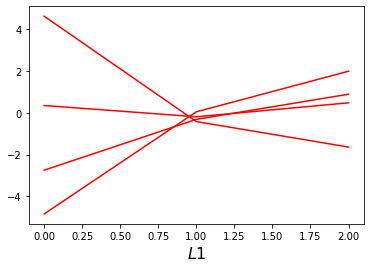

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline 
#適用於 Jupyter Notebook, 宣告直接在cell 內印出執行結果

plt.plot(syn0_history[0], ms=1, lw=1.5, color='red')
plt.xlabel(r'$L1$', fontsize=16)
plt.show()

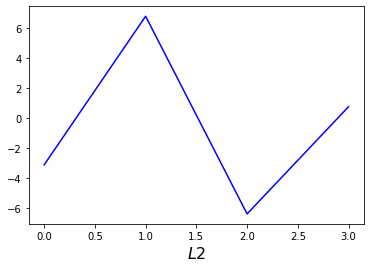

In [8]:
plt.plot(syn1_history[0], ms=1, lw=1.5, color='blue')
plt.xlabel(r'$L2$', fontsize=16)
plt.show()

In [9]:
syn0_history[0]

array([[-2.75017888,  4.62437497, -4.84641498,  0.34780065],
       [-0.31576966, -0.42253318,  0.04629259, -0.19218162],
       [ 0.88894524, -1.64368732,  1.99158432,  0.47598287]])

In [10]:
# weird, i dont see any updates
# ok, there are updates after adjustments based on the reference answer
syn1_history[0]

array([[-3.09995502],
       [ 6.79244782],
       [-6.36903892],
       [ 0.76852849]])